<a href="http://cocl.us/pytorch_link_top">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/Pytochtop.png" width="750" alt="IBM Product " />
</a> 

<img src="https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png" width="200" alt="cognitiveclass.ai logo" />

<h1>Practice: Use the Sequential Constructor to test Sigmoid, Tanh, and Relu Activations Functions on the  MNIST Dataset</h1>

<h2>Table of Contents</h2>
<p>In this lab, you will test the Sigmoid, Tanh, and Relu activation function on the MNIST dataset using <code>nn.Sequential</code>.</p>
<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Test">Test Sigmoid, Tanh, and Relu</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>

<hr>

<h2>Preparation</h2>

We'll need the following libraries

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

<!--Empty Space for separating topics-->

<h2 id="Model">Neural Network Module and Training Function</h2> 

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss, and accuracy on the validation data. 

In [2]:
# Define the function to train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [],'validation_accuracy': []}  
    
    for epoch in range(epochs):
        for i,(x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.data.item())
        
        correct = 0
        for x, y in validation_loader:
            yhat = model(x.view(-1, 28 * 28))
            _, label = torch.max(yhat, 1)
            correct += (label == y).sum().item()
    
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)
    
    return useful_stuff

<!--Empty Space for separating topics-->

<h2 id="Makeup_Data">Make Some Data</h2> 

Load the training dataset by setting the parameter <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [3]:
# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>:

In [4]:
# Create a validation  dataset 

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Create the criterion function:  

In [5]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

Create the training-data loader and the validation-data loader objects: 

In [6]:
# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)

<!--Empty Space for separating topics-->

<h2 id="Test">Test Sigmoid, Tanh, and Relu and Train the Model</h2> 

Use the following parameters to construct the model:

In [7]:
# Use the following parameters to construct the model

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

<!--Empty Space for separating topics-->

<h3>Try</h3>

Use <code>nn.Sequential</code> to build a one hidden layer neural network <code> model</code>with a sigmoid activation to classify the 10 digits from the MNIST dataset.

In [9]:
# Practice: Use nn.sequential and Sigmoid function to create the model

learning_rate = 0.01

model = nn.Sequential(torch.nn.Linear(28*28,100), torch.nn.Sigmoid(), torch.nn.Linear(100,10))

# Type your code here

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=30)

Double-click <b>here</b> for the solution.

<!-- 
model=nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Sigmoid(),
    nn.Linear(hidden_dim, output_dim),
)
-->

<!--Empty Space for separating topics-->

<h3>Try</h3>

Use <code>nn.Sequential</code> to build a one hidden layer neural <code>model_Tanh</code> network with a Tanh activation to classify the 10 digits from the MNIST dataset.

In [12]:
# Practice: Use nn.sequential and Tanh function to create the model

learning_rate = 0.01

model_Tanh = nn.Sequential(torch.nn.Linear(28*28,100), torch.nn.Tanh(), torch.nn.Linear(100,10))

# Type your code here

optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs=5)

Double-click <b>here</b> for the solution.

<!-- 
model_Tanh=nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.Tanh(),
    nn.Linear(hidden_dim, output_dim),
)    
-->

<!--Empty Space for separating topics-->

<h3>Try</h3>

Use <code>nn.Sequential</code> to build a one hidden layer neural <code>modelRelu</code> network with a Relu activation to classify the 10 digits from the MNIST dataset.

In [13]:
# Practice: Use nn.sequential and Relu function to create the model

learning_rate = 0.01

modelRelu = nn.Sequential(torch.nn.Linear(28*28,100), torch.nn.ReLU(), torch.nn.Linear(100,10))

# Type your code here

optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=5)

Double-click <b>here</b> for the solution.

<!-- 
modelRelu = torch.nn.Sequential(
    nn.Linear(input_dim, hidden_dim),
    nn.ReLU(),
    nn.Linear(hidden_dim, output_dim),
)
-->


<!--Empty Space for separating topics-->

<h2 id="Result">Analyze Results</h2> 

Compare the training loss for each activation:

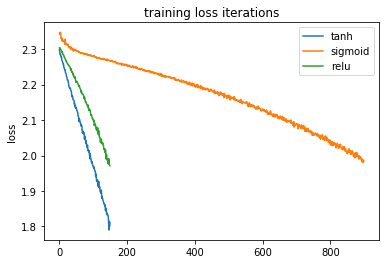

In [14]:
# Compare the training loss

plt.plot(training_results_tanch['training_loss'], label='tanh')
plt.plot(training_results['training_loss'], label='sigmoid')
plt.plot(training_results_relu['training_loss'], label='relu')
plt.ylabel('loss')
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

Compare the validation loss for each model:  

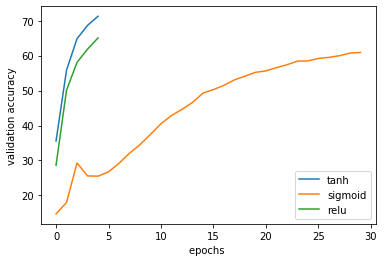

In [15]:
# Compare the validation loss

plt.plot(training_results_tanch['validation_accuracy'], label='tanh')
plt.plot(training_results['validation_accuracy'], label='sigmoid')
plt.plot(training_results_relu['validation_accuracy'], label='relu') 
plt.ylabel('validation accuracy')
plt.xlabel('epochs ')   
plt.legend()

<!--Empty Space for separating topics-->

<a href="http://cocl.us/pytorch_link_bottom">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/notebook_bottom%20.png" width="750" alt="PyTorch Bottom" />

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD. 

Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>

<hr>

Copyright &copy; 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.